
<h1 style="padding-top: 25px;padding-bottom: 25px;text-align: left; padding-left: 10px; background-color: #DDDDDD; 
    color: black;"> <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> AC295: Advanced Practical Data Science </h1>

## Lecture 7: Distillation and Compression

**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors**: Pavlos Protopapas <br>
**TF**: Michael Emanuel, Andrea Porelli and Giulia Zerbini  <br>
**Author**: Andrea Porelli and Pavlos Protopapas

<hr style='height:2px'>

# Table of Contents
* [Lecture 7: Distillation and Compression](#Lecture-7:-Distillation-and-Compression)
    * [Part 1: Knowledge distillation: Teacher student learning](#Part-1:-Knowledge-distillation:-Teacher-student-learning)
        * [1.1 Matching logits is a special case of distillation](#1.1-Matching-logits-is-a-special-case-of-distillation)
        * [1.2 Temperature](#1.2-Temperature)
        * [1.3 Examples from the paper](#1.3-Examples-from-the-paper)
    * [Part 2: Use Cases](#Part-2:-Use-Cases)
        * [2.1 Transfer learning through Network Distillation](#2.1-Transfer-learning-through-Network-Distillation)
        * [2.2 Another use case?](#2.2-Another-use-case?)

## Part 1: Knowledge distillation: Teacher student learning

Geoffrey Hinton's words: 
- Many insects have two very different forms: 
  - a larval form: optimised to extract energy and nutrients from environment 
  - an adult form: optimized for traveling and reproduction
  
- ML typically uses the same model for training stage and the deployment stage! Despite  very different requirements:
  - Training: should extract structure, should not be real time, thus can use a huge amount of computation. 
  - Deployment: large number of users, more stringent requirements on latency and computational resources.

**Question:** is it possible to distill and compress the *knowledge* of the large and complex training model (the teacher) into a small and simple deployment model (the student)?

**Brings us to the question what is knowledge (in a NN)?**
- The weights of network?
- The mapping from input to output?

**Goal:** train a student model to generalize in the same way as the large model.

### 1.1 Matching logits is a special case of distillation


- Normal training objective is to maximize the average log probability of the correct class.
- Yet Hinton:
  - "*Relative probabilities of incorrect answers tell us a lot about how the teacher model tends to generalize.*"
  - Ex.: "*An image of a BMW, may only have a very small chance of being mistaken for a garbage truck, but that mistake is still many times more probable than mistaking it for a carrot.*"
  <img src="https://i.imgur.com/zvTR1r7.png" alt="https://towardsdatascience.com/knowledge-distillation-simplified-dd4973dbc764" width=60%/>

  - **The predictions of the teacher model contain a lot of usefull information regarding the generalization!**
  - **Thus our student networks tries to match the teacher network predictions.**
  <img src="https://i.imgur.com/l80RVDT.jpg" alt="https://towardsdatascience.com/knowledge-distillation-simplified-dd4973dbc764" width=80%/>

**The final  loss-function of the student network ( $\mathscr{L}_\text{student }$ ) is a combination of:**
1. Standard cross entropy with correct labels ( $\mathscr{L}_\text{correct labels }$  )
  - ex. match label: 100% BWM
2. Cross entropy with the soft targets from the teacher network predictions ( $\mathscr{L}_\text{soft teacher predictions }$  )
  - ex. match teacher prediction: 99.5% BWM, 0.4% garbage truk, ... , 0.000001% carrot

How these two parts of the loss function should be weighted is determined by the hyperparameter $\lambda$:
  $$\mathscr{L}_\text{student} = \mathscr{L}_\text{correct labels} + \lambda \mathscr{L}_\text{soft teacher predictions}$$

## **1.2 Temperature**

Much information resides in the ratios of very small probabilities in the predictions: 
ex.: one version of a 2 may be given a probability of $10^{-6}$ of being a 3 and $10^{-9}$ of being a 7 , whereas for another version it may be the other way around.

- Since most probabilities are very close to zero we expect very little influence on the cross-entropy cost function.
- **How to fix this?** 
   - Raise the **"temperature" of the final softmax** until the teacher model produces a soft set of targets ($z_i$ are logits, T is Temperature):
   $$q_i = \dfrac{\exp(z_i/T)}{\sum_j \exp(z_j/T)}$$
   - Using a higher value for $T$ produces a softer probability distribution over classes. Illustrating:

Text(0.5,1,'Logits  ')

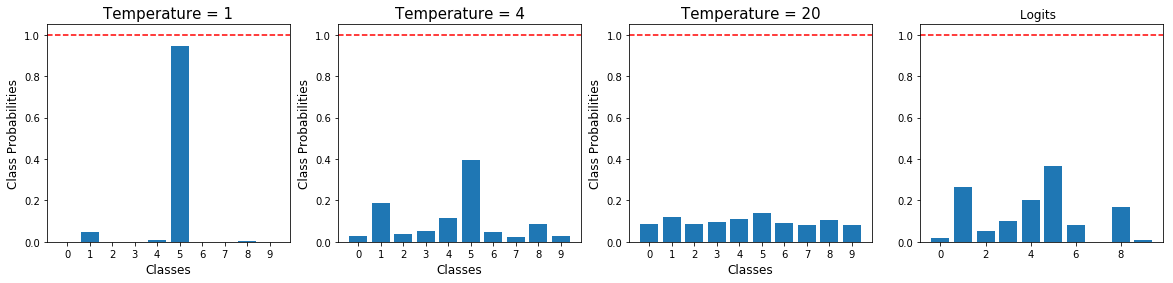

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 

z_i = np.array([0.5, 8  , 1.5, 3, 6   ,
                11 , 2.5, 0.01  , 5, 0.2 ])

# Tested probabilities
Temperatures = [1, 4, 20]

plt.figure(figsize=(20, 4))


for i, T in enumerate(Temperatures):
    plt.subplot(1, 4, i+1)

    # Temperature adjusted soft probabilities:
    q_i = np.exp(z_i/T)/np.sum(np.exp(z_i/T))

    # Plotting the barchart
    plt.bar(range(0,10), q_i)
    plt.title('Temperature = '+ str(T), size=15)
    plt.xticks(range(10) , range(10), size=10)
    plt.xlabel('Classes', size=12)
    plt.ylabel('Class Probabilities', size=12)
    plt.axhline(y=1, linestyle = '--', color = 'r')
    
    
plt.subplot(1, 4, 4)
plt.bar(range(0,10), z_i/30)
plt.axhline(y=1, linestyle = '--', color = 'r')
plt.ylim(0,1.05)

plt.title('Logits  ')

## **1.3 Examples from the paper**

- Experiment 1: simple MNIST 
   - Large Teacher network - 2 layers of **1200 neurons** hidden units: **67**/10000 test errors.
   - Original student network - 2 layers of **800 neurons** hidden units: **146**/10000 test errors.
   - Distilled student network - 2 layers of **800 neurons** hidden units: **74**/10000 test error.
<br/><br/>
- Experiment 2: Distillation can even teach a student network about classes it has never seen: 
  - During training all the "3" digits are hidden for the student network. 
  - So "3" is a mythical digit the student network never has seen!
  - Still using distillation it manages to  correctly classify 877 out of 1010 "3"s in the test set! 
  - After adjusting the bias term 997/1010 3's are correctly classified!

## Part 2: Use Cases

Let's use Transfer Learning, to build some applications. It is convenient to run the applications on Google Colab. Check out the links below. 

### 2.1Transfer learning through Network Distillation
- In distillation a small simple (*student*) network tries to extract or distill knowledge from a large and complex (*teacher*) network. 
- This is also known as student-teacher networks or compression, as we try to compress a large model into a small model.
- Goal:
    - Understand Knowledge Distillation
    - Force a small segmentation network (based on Mobilenet) to learn from a large network (deeplab_v3).

- Find more on the colab notebook [Lecture 7: Use Case Distillation and Compression](https://colab.research.google.com/drive/1l8qVX9-CsV9oae02Kb9NXDmWUjNd79G6)